<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/Practice_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice 3-2

Train previous model by FashionMNIST dataset. Moreover, show accuracy rate and generate the Confusion Matrix about the test data recognition.

## install trochinfo

In [4]:
!pip install torchinfo

100%|██████████| 26421880/26421880 [00:08<00:00, 3284107.42it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 172624.24it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:07<00:00, 576649.00it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24343040.58it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

60000


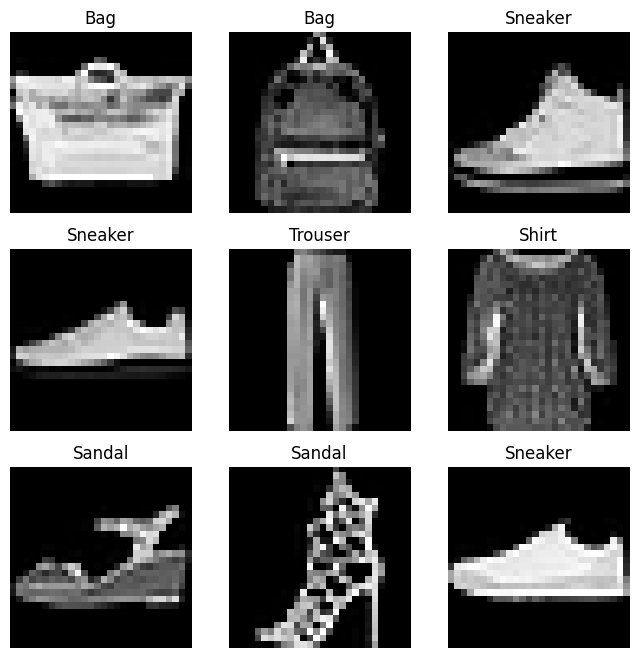

torch.Size([1, 28, 28])


In [2]:
import os
import torch
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torch import nn
import matplotlib.pyplot as plt

training_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)


labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
print(len(training_data)) # 60000
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print(img.shape)


## Create model and show model summary

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch.nn.functional as F

# Create model
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 256),
    torch.nn.Linear(256, 10),
).to(device)
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(784,256)
#         self.fc2 = nn.Linear(256, 10)
#         self.dropout1 = nn.Dropout(0.2)
#         self.dropout2 = nn.Dropout(0.2)

#     def forward(self, x):
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = self.dropout1(x)
#         x = self.fc2(x)
#         x = self.dropout2(x)
#         output = F.softmax(x, dim=1)
#         return output

# model = Net().to(device)


epochs = 5
lr=0.1

# Create DataLoader
train_loader = DataLoader(training_data, batch_size=600)

# Set optimizer
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

model.train() # set the model to training mode
loss_list = []


from torchinfo import summary
print(summary(model,(1,28*28)))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 256]                  200,960
├─Linear: 1-3                            [1, 10]                   2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
Total mult-adds (M): 0.20
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.81
Estimated Total Size (MB): 0.82


## train date

In [13]:

for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')



Epoch 1: [    0 / 60000] (0 %)  Loss: 2.312688
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.839313
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.509305
Epoch 1: [18000 / 60000] (30 %)  Loss: 1.302957
Epoch 1: [24000 / 60000] (40 %)  Loss: 1.143771
Epoch 1: [30000 / 60000] (50 %)  Loss: 1.000082
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.955664
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.863350
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.766879
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.829182
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.798941
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.777169
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.725484
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.759213
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.744815
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.663828
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.713500
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.642381
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.571310
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.680201
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.64

## Load Data

Average_loss: 0.0001, correct_rate: 8128/10000 (81%)



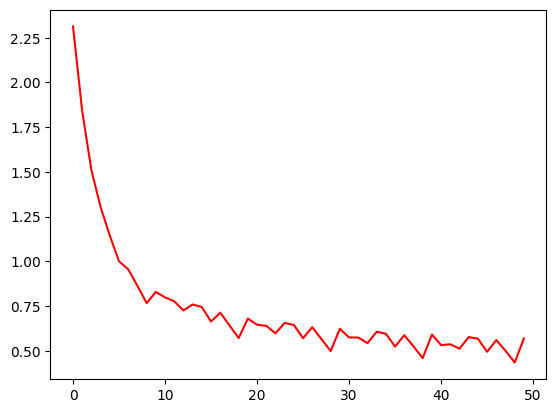

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_list, 'r')
test_loader = DataLoader(test_data, shuffle=False, batch_size=test_data.targets.shape[0])

model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)

    # sum up batch loss
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1)
    correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'Average_loss: {test_loss:.4f}, correct_rate: {correct}/{data_count}' +
      f' ({percentage:.0f}%)\n')


## Confusion Matrix

In [15]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix

predictions = []
with torch.no_grad():
    for i in range(len(test_data)):
        data, target = test_data[i][0], test_data[i][1]
        data = data.reshape(1, *data.shape).to(device) # *:Unpack the list into independent parameters
        output = torch.argmax(model(data), axis=-1)
        predictions.append(output.item())


y_true = test_data.targets.numpy()
y_pred = predictions

# print(y_true)
# print(y_pred)

print(f'accuracy_score:{accuracy_score(y_true, y_pred)}')

print(confusion_matrix(y_true, y_pred))


accuracy_score:0.8128
[[815   7  11  62   5   0  74   0  25   1]
 [  5 937  13  35   7   0   1   0   2   0]
 [ 28   2 632  11 227   1  85   0  14   0]
 [ 29  15  11 854  46   1  38   0   6   0]
 [  0   2  60  34 832   1  64   0   7   0]
 [  1   0   0   3   0 852   0  73   8  63]
 [177   2 117  46 182   2 438   0  36   0]
 [  0   0   0   0   0  32   0 888   0  80]
 [  1   1  11  11   4   6  21   6 938   1]
 [  0   0   0   0   0   7   0  49   2 942]]
